# Loops and Vectorization

## EOSC 211

**Week 5 Day 1**

**Learning Objectives:**  
1. Make code more efficient and cleaner by using vector operations instead of loops
2. Get familiar with the timeit decorator



## Question 1

**Re-write the following function without a loop**

In [1]:
import numpy as np
x1 = np.random.rand(1000000)
x2 = np.empty_like(x1)

# rewrite this code
def more_than_half(x1):
    x2 = np.empty_like(x1)
    for i in range(len(x1)):
        if x1[i] > 0.5:
            x2[i] = 1
        else:
            x2[i] = 0
    return x2

In [2]:
# your code here

In [3]:
# andrew's soln
def more_than_half(x1):
    x2 = np.zeros_like(x1)
    x2[np.where(x1 > 0.5)] = 1
    return x2

x2 = more_than_half(x1)
print(x1[:5])
print(x2[:5])

[0.97197273 0.92494125 0.0154044  0.79198366 0.49697246]
[1. 1. 0. 1. 0.]


## Question 2

**Which of the two code snippets perform the operation faster? We can find out using the `timeit` module! The code below shows how long it takes for a simple function to run (the @ is called a *decorator function*, more info [here](my favorite decorator tutorial)). Modify the snippet below to time your functions for question 1.**

In [4]:
from wk11_functions import timeit

@timeit
def count_one_million():
    for i in range(1000000):
        x = i
        
count_one_million()

'time to run function: 0.03499603271484375 sec'

In [5]:
# your code here

In [6]:
# andrew's soln


@timeit
def loop(x1):  ## just copy and paste the function body
    x2 = np.empty_like(x1)
    for i in range(len(x1)):
        if x1[i] > 0.5:
            x2[i] = 1
        else:
            x2[i] = 0
    return x2


@timeit
def vector(x1):
    x2 = np.zeros_like(x1)
    x2[np.where(x1 > 0.5)] = 1
    return x2


print(f"Loop:{loop(x1)}")
print(f"Vector:{vector(x1)}")

Loop:time to run function: 0.32505297660827637 sec
Vector:time to run function: 0.009999990463256836 sec


## Question 3

**The points on a circle, radius $R$, centered at $(x_c,y_c)$ are given by**

$$
x = x_c + R cos(\theta)
$$
$$
y = y_c + R sin(\theta)
$$

**where $\theta$ is the angle between the x-axis and the line from the center of the circle to any given point on the circle.  i.e. $\theta$ goes from $0$ to $2\pi$.**

**Write a function called `getcirc` that will take as input the variables `xc`, `yc`, `R` and the number of points on the circle `N` in that order and return numpy arrays `x` and `y` containing the x and y coordinates of the N points on the circle.**

**Add a subfunction called checkRN that checks that the radius R is positive and that the number of points is at least 20 (for a reasonably smooth circle).**


In [7]:
# your code here

In [24]:
# andrew's soln
def getcirc(xc, yc, R, N):
    """
    Generates a circle of radius "R", centered at point (xc, yc), 
    containing N points. 
    
    Returns circle coords x, y (numpy arrays)
    """
    def check_RN(R, N):
        """
        errors must not pass silently, unless explicitly silenced 
                                                             -T.P.
        """
        if R < 0:
            print("radius must be > 0")
        elif N < 20:
            print("number of points must be > 20")
        else:
            pass  
        
        return None
    
    check_RN(R, N)
    
    # or 
    assert (R > 0), "radius must be > 0"
    assert (N >= 20), "number of points must be >= 20"
    
    theta = np.linspace(0, 2 * np.pi, N)
    
    x = xc + R * np.cos(theta)
    y = yc + R * np.sin(theta)
    
    return x, y

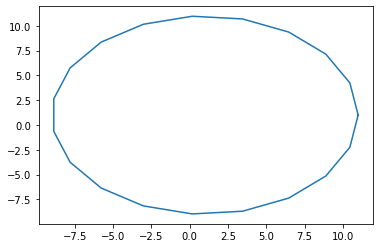

In [26]:
# test out my function
x, y = getcirc(1,1,10,20)

from matplotlib import pyplot as plt
plt.plot(x,y)